In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import csv
import networkx as nx
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

In [2]:
vocabulary = pd.read_csv('../input/vocabulary.csv')
vocabulary.head()

,Index,TrainVideoCount,KnowledgeGraphId,Name,WikiUrl,Vertical1,Vertical2,Vertical3,WikiDescription
0,0,788288,/m/03bt1gh,Game,https://en.wikipedia.org/wiki/Game,Games,NaN,NaN,"A game is structured form of play, usually und..."
1,1,539945,/m/01mw1,Video game,https://en.wikipedia.org/wiki/Video_game,Games,NaN,NaN,A video game is an electronic game that involv...
2,2,415890,/m/07yv9,Vehicle,https://en.wikipedia.org/wiki/Vehicle,Autos & Vehicles,NaN,NaN,A vehicle is a mobile machine that transports ...
3,3,378135,/m/01jddz,Concert,https://en.wikipedia.org/wiki/Concert,Arts & Entertainment,NaN,NaN,A concert is a live music performance in front...
4,4,286532,/m/09jwl,Musician,https://en.wikipedia.org/wiki/Musician,Arts & Entertainment,NaN,NaN,A musician is a person who plays a musical ins...


In [3]:
vocabulary.describe()

,Index,TrainVideoCount
count,3862.000000,3862.000000
mean,1930.500000,3032.527188
std,1115.007698,21182.048375
min,0.000000,123.000000
25%,965.250000,234.000000
50%,1930.500000,440.500000
75%,2895.750000,1199.750000
max,3861.000000,788288.000000


In [4]:
vocabulary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3862 entries, 0 to 3861
Data columns (total 9 columns):
Index               3862 non-null int64
TrainVideoCount     3862 non-null int64
KnowledgeGraphId    3862 non-null object
Name                3806 non-null object
WikiUrl             3806 non-null object
Vertical1           3862 non-null object
Vertical2           584 non-null object
Vertical3           32 non-null object
WikiDescription     3806 non-null object
dtypes: int64(2), object(7)
memory usage: 271.6+ KB


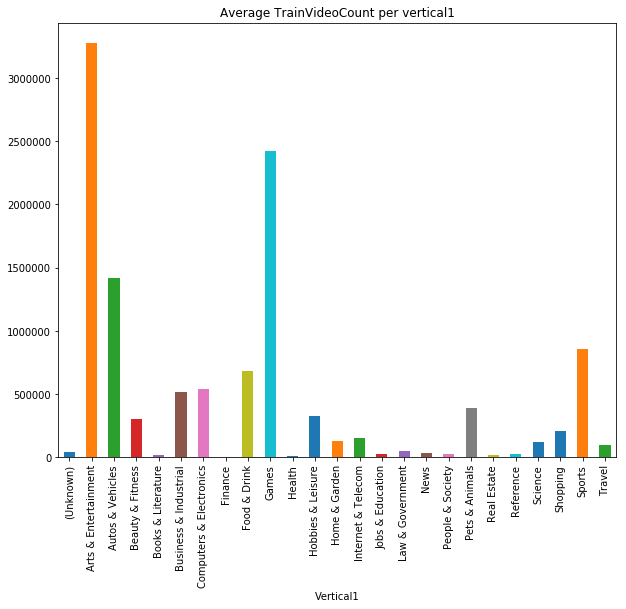

In [5]:
plt.figure(figsize = (10,8))
vocabulary.groupby('Vertical1').TrainVideoCount.sum().plot(kind="bar")
plt.title("Average TrainVideoCount per vertical1")
plt.show()

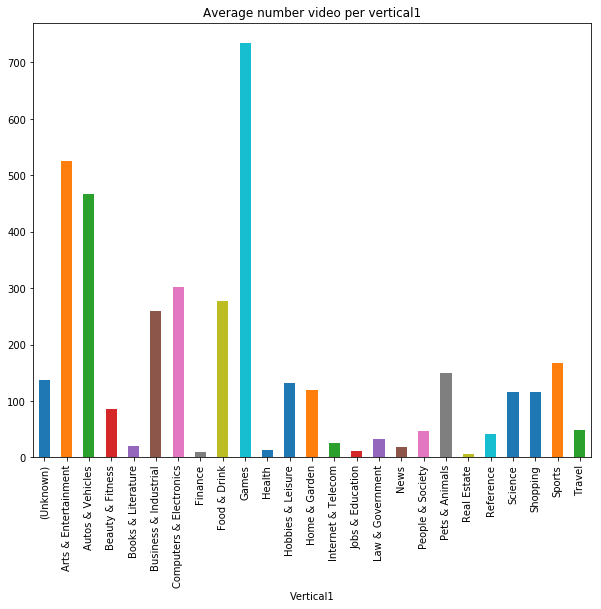

In [6]:
plt.figure(figsize = (10,8))
vocabulary.groupby('Vertical1').Index.count().plot(kind="bar")
plt.title("Average number video per vertical1")
plt.show()

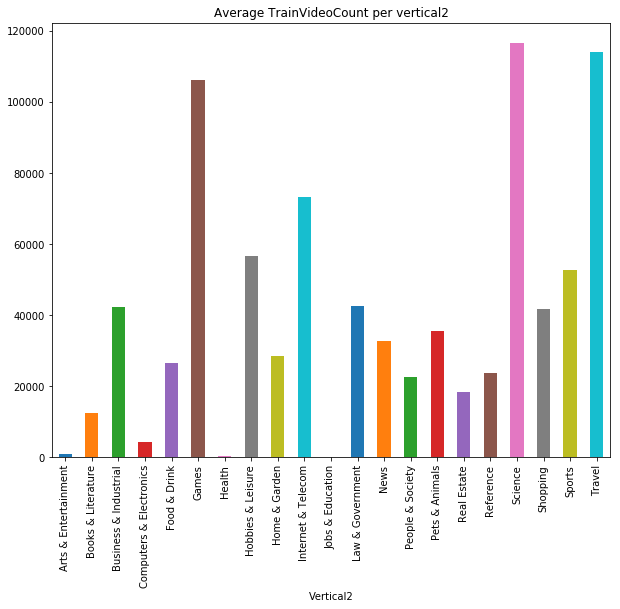

In [7]:
plt.figure(figsize = (10,8))
vocabulary.groupby('Vertical2').TrainVideoCount.sum().plot(kind="bar")
plt.title("Average TrainVideoCount per vertical2")
plt.show()

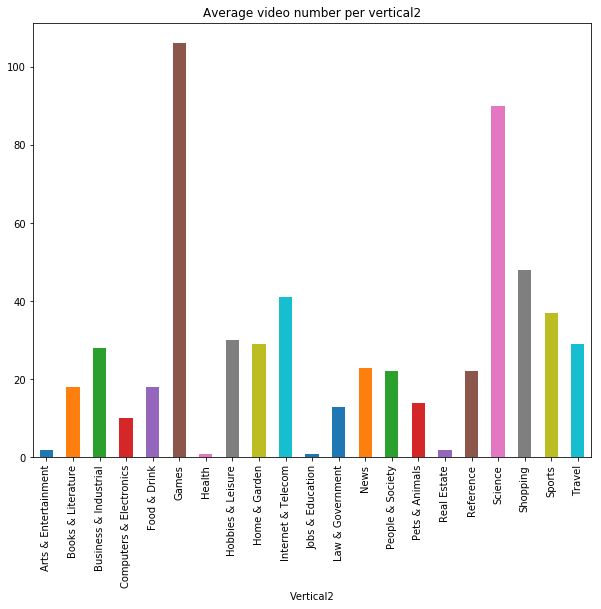

In [8]:
plt.figure(figsize = (10,8))
vocabulary.groupby('Vertical2').TrainVideoCount.count().plot(kind="bar")
plt.title("Average video number per vertical2")
plt.show()

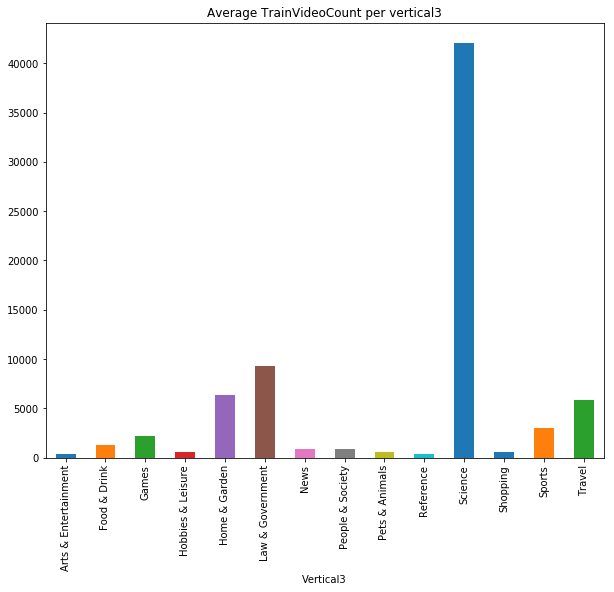

In [9]:
plt.figure(figsize = (10,8))
vocabulary.groupby('Vertical3').TrainVideoCount.sum().plot(kind="bar")
plt.title("Average TrainVideoCount per vertical3")
plt.show()

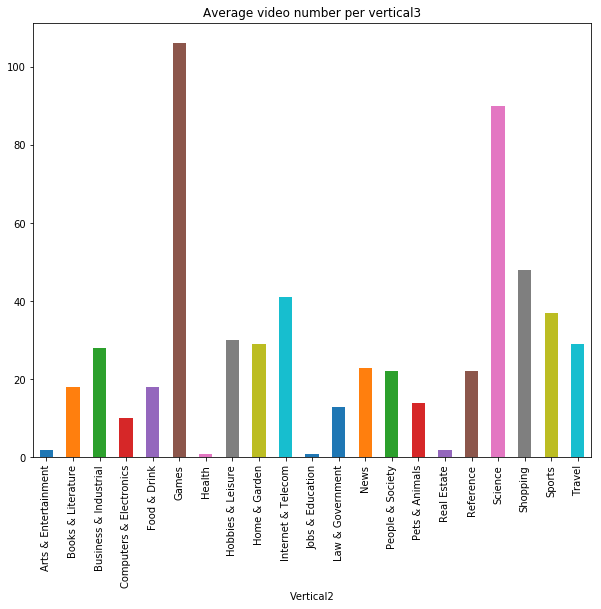

In [10]:
plt.figure(figsize = (10,8))
vocabulary.groupby('Vertical2').TrainVideoCount.count().plot(kind="bar")
plt.title("Average video number per vertical3")
plt.show()

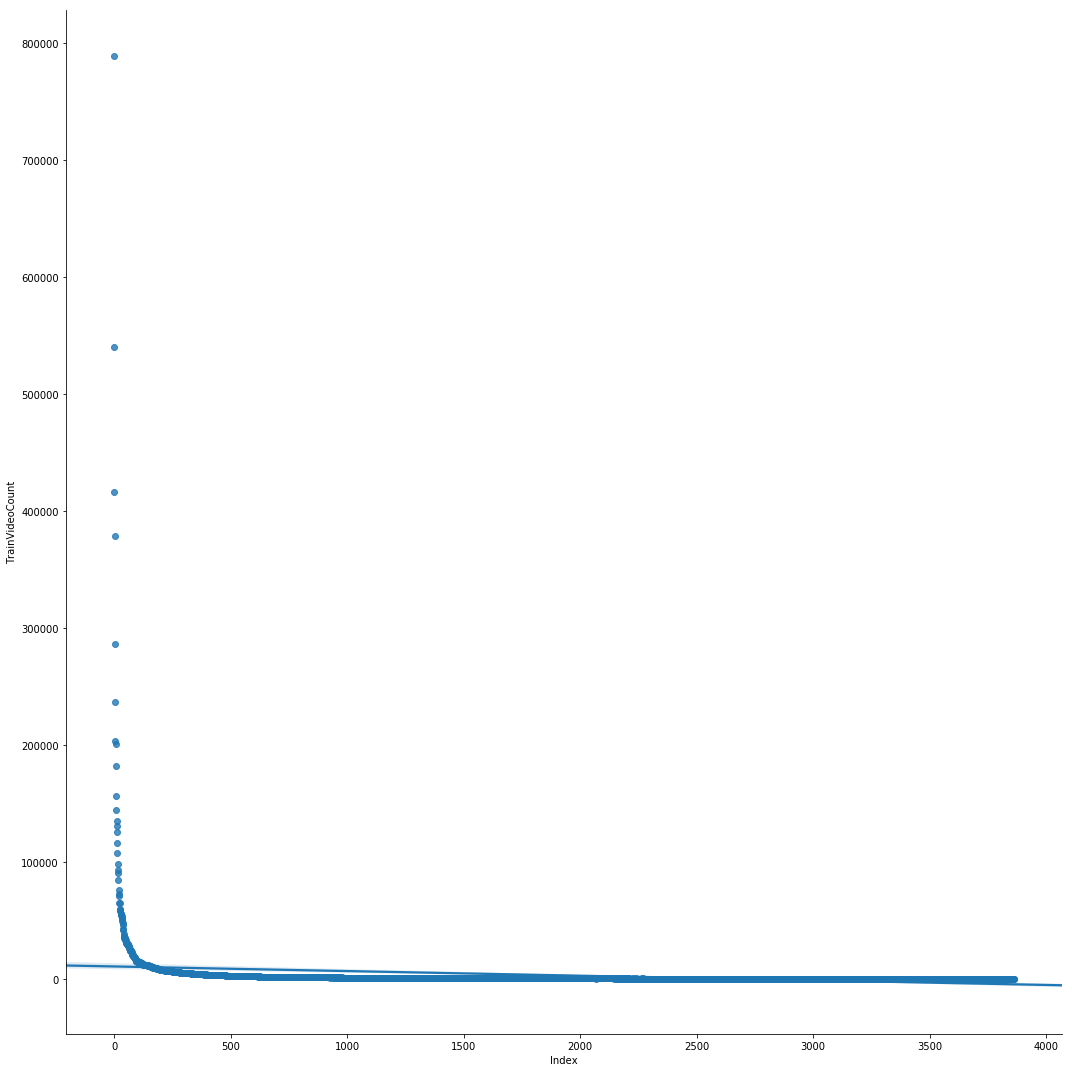

In [11]:
sns.lmplot(x='Index', y='TrainVideoCount', data=vocabulary , size=15)

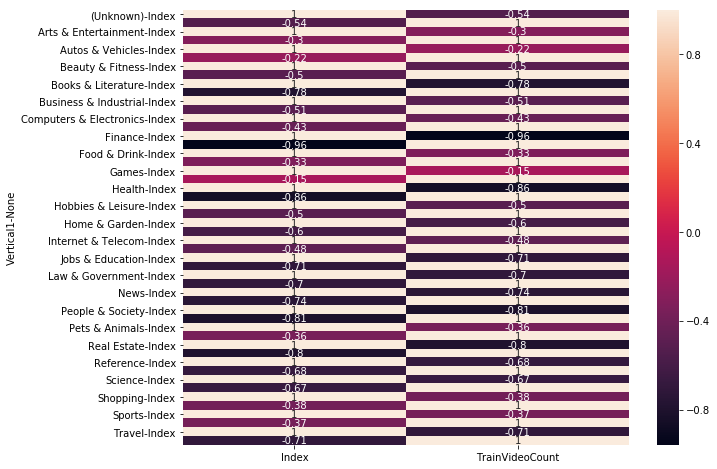

In [12]:
plt.figure(figsize = (10,8))
sns.heatmap(vocabulary.groupby('Vertical1').corr(), annot=True )
plt.show()

In [13]:
vocabulary.groupby('Vertical1').corr()

Index  TrainVideoCount
Vertical1                                                         
(Unknown)               Index            1.000000        -0.537894
                        TrainVideoCount -0.537894         1.000000
Arts & Entertainment    Index            1.000000        -0.304096
                        TrainVideoCount -0.304096         1.000000
Autos & Vehicles        Index            1.000000        -0.217616
                        TrainVideoCount -0.217616         1.000000
Beauty & Fitness        Index            1.000000        -0.501818
                        TrainVideoCount -0.501818         1.000000
Books & Literature      Index            1.000000        -0.781284
                        TrainVideoCount -0.781284         1.000000
Business & Industrial   Index            1.000000        -0.507305
                        TrainVideoCount -0.507305         1.000000
Computers & Electronics Index            1.000000        -0.433831
                        TrainVideoCount -0.433831         1.000000
Finance                 Index            1.000000        -0.958945
                        TrainVideoCount -0.958945         1.000000
Food & Drink            Index            1.000000        -0.327166
                        TrainVideoCount -0.327166         1.000000
Games                   Index            1.000000        -0.145899
                        TrainVideoCount -0.145899         1.000000
Health                  Index            1.000000        -0.856425
                        TrainVideoCount -0.856425         1.000000
Hobbies & Leisure       Index            1.000000        -0.502998
                        TrainVideoCount -0.502998         1.000000
Home & Garden           Index            1.000000        -0.600545
                        TrainVideoCount -0.600545         1.000000
Internet & Telecom      Index            1.000000        -0.484348
                        TrainVideoCount -0.484348         1.000000
Jobs & Education        Index            1.000000        -0.713268
                        TrainVideoCount -0.713268         1.000000
Law & Government        Index            1.000000        -0.704173
                        TrainVideoCount -0.704173         1.000000
News                    Index            1.000000        -0.741581
                        TrainVideoCount -0.741581         1.000000
People & Society        Index            1.000000        -0.808277
                        TrainVideoCount -0.808277         1.000000
Pets & Animals          Index            1.000000        -0.361466
                        TrainVideoCount -0.361466         1.000000
Real Estate             Index            1.000000        -0.798106
                        TrainVideoCount -0.798106         1.000000
Reference               Index            1.000000        -0.679064
                        TrainVideoCount -0.679064         1.000000
Science                 Index            1.000000        -0.666460
                        TrainVideoCount -0.666460         1.000000
Shopping                Index            1.000000        -0.379893
                        TrainVideoCount -0.379893         1.000000
Sports                  Index            1.000000        -0.368504
                        TrainVideoCount -0.368504         1.000000
Travel                  Index            1.000000        -0.705518
                        TrainVideoCount -0.705518         1.000000

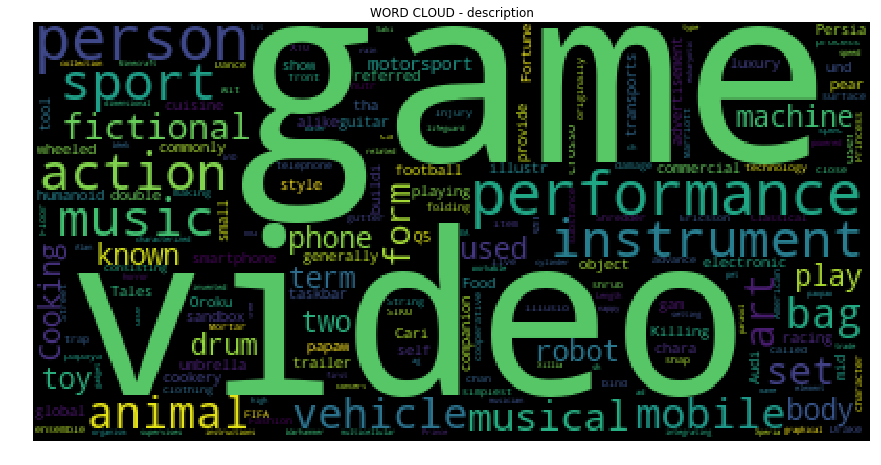

In [14]:
plt.figure(figsize = (15,15))

stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=1000,
                          max_font_size=120, 
                          random_state=42
                         ).generate(str(vocabulary['WikiDescription']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - description")
plt.axis('off')
plt.show()

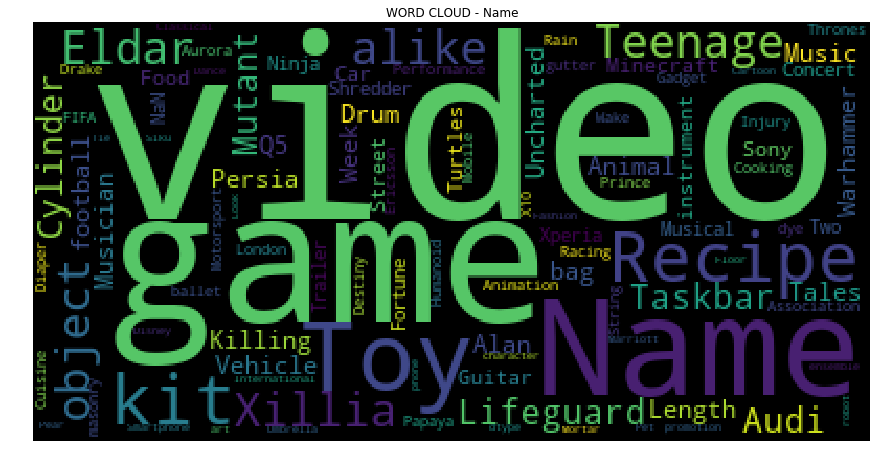

In [15]:
plt.figure(figsize = (15,15))

stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=1000,
                          max_font_size=120, 
                          random_state=42
                         ).generate(str(vocabulary['Name']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - Name")
plt.axis('off')
plt.show()

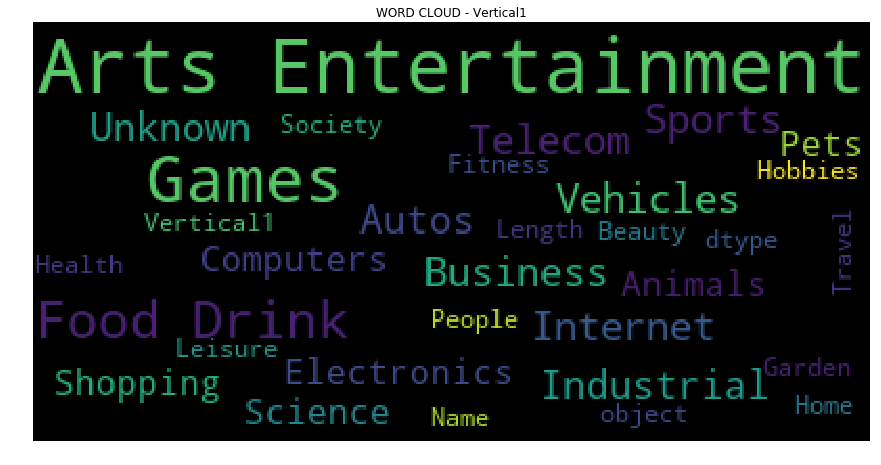

In [16]:
plt.figure(figsize = (15,15))

stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=1000,
                          max_font_size=120, 
                          random_state=42
                         ).generate(str(vocabulary['Vertical1']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - Vertical1")
plt.axis('off')
plt.show()

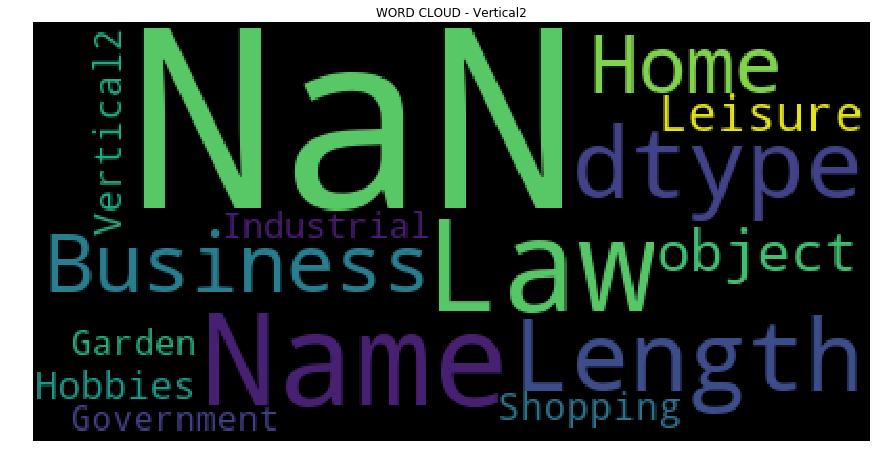

In [17]:
plt.figure(figsize = (15,15))

stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=1000,
                          max_font_size=120, 
                          random_state=42
                         ).generate(str(vocabulary['Vertical2']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - Vertical2")
plt.axis('off')
plt.show()

In [18]:
with open('../input/vocabulary.csv', 'r') as f:
  vocabularylist = list(csv.reader(f))
T1=[]
for l in vocabularylist:
    if l[5] != 'NaN' and l[6] !='NaN' and l[5] != '' and l[6] !='' and l[5] !=  l[6] :
        c1 = l[5]
        c2 = l[6]
        tuple = (c1, c2)
    if l[5] != 'NaN' and l[7] !='NaN' and l[5] != '' and l[7] !='' and l[5] !=  l[7] :
        c1 = l[5]
        c2 = l[7]
        tuple = (c1, c2)
    if l[6] != 'NaN' and l[7] !='NaN' and l[6] != '' and l[7] !='' and l[7] !=  l[6] :
        c1 = l[6]
        c2 = l[7]
        tuple = (c1, c2)
    T1.append(tuple)
edges = {k: T1.count(k) for k in set(T1)}
edges
        

{('Arts & Entertainment', 'Books & Literature'): 93,
 ('Arts & Entertainment', 'Business & Industrial'): 18,
 ('Arts & Entertainment', 'Computers & Electronics'): 28,
 ('Arts & Entertainment', 'Food & Drink'): 28,
 ('Arts & Entertainment', 'Games'): 228,
 ('Arts & Entertainment', 'Hobbies & Leisure'): 15,
 ('Arts & Entertainment', 'Home & Garden'): 3,
 ('Arts & Entertainment', 'News'): 56,
 ('Arts & Entertainment', 'People & Society'): 120,
 ('Arts & Entertainment', 'Reference'): 53,
 ('Arts & Entertainment', 'Science'): 26,
 ('Arts & Entertainment', 'Shopping'): 73,
 ('Arts & Entertainment', 'Sports'): 26,
 ('Arts & Entertainment', 'Travel'): 13,
 ('Autos & Vehicles', 'Business & Industrial'): 114,
 ('Autos & Vehicles', 'Computers & Electronics'): 1,
 ('Autos & Vehicles', 'Hobbies & Leisure'): 17,
 ('Autos & Vehicles', 'Law & Government'): 19,
 ('Autos & Vehicles', 'News'): 6,
 ('Autos & Vehicles', 'People & Society'): 8,
 ('Autos & Vehicles', 'Science'): 5,
 ('Autos & Vehicles', 'Sho